In [70]:
%cd /content/drive/MyDrive/21-1/Computational Physics/data/myModules/myModules

/content/drive/MyDrive/21-1/Computational Physics/data/myModules/myModules


In [2]:
!cat rootsearch.py

## module rootsearch
'''  x1,x2 = rootsearch(f,a,b,dx).
    Searches the interval (a,b) in increments dx for
    the bounds (x1,x2) of the smallest root of f(x).
    Returns x1 = x2 = None if no roots were detected.
'''
from numpy import sign

def rootsearch(f,a,b,dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while sign(f1) == sign(f2):
        if x1  >=  b: return None,None
        x1 = x2; f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    else:
        return x1,x2


In [71]:
from rootsearch import *
from bisection import *

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import root_scalar

In [37]:
%cd /content/drive/MyDrive/21-1/Computational Physics/data/datafolder

/content/drive/MyDrive/21-1/Computational Physics/data/datafolder


In [16]:
df=pd.read_csv('3.1_7.dat',header=None)

In [17]:
df=df.T
df.columns=['x','y']

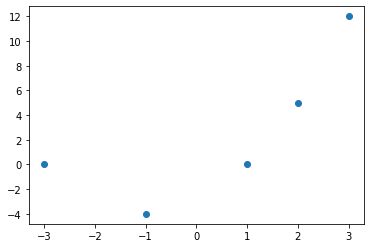

In [22]:
plt.plot(df.x,df.y,'o')

In [26]:
pfit=np.polyfit(df.x,df.y,2)
line=np.poly1d(pfit)

In [35]:
rootsearch(line-3,1,3,1e-3)

(1.644999999999929, 1.6459999999999289)

In [38]:
df=pd.read_csv('3.1_2.dat',header=None)

In [40]:
df=df.T
df.columns=['x','y']

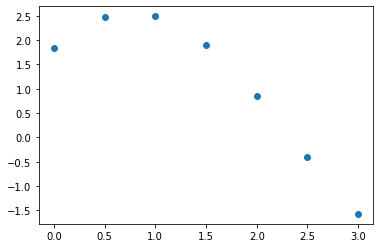

In [41]:
plt.plot(df.x,df.y,'o')

In [45]:
pfit=np.polyfit(df.x,df.y,3)
y1=np.poly1d(pfit)

In [52]:
rootsearch(y1-2,-1,0.5,1e-4)

(0.08489999999990758, 0.08499999999990758)

In [53]:
rootsearch(y1-2,1,2,1e-4)

(1.4125999999999546, 1.4126999999999545)

In [59]:
f=lambda x: x**3-10*x**2+5
x=np.arange(0,1,0.1)

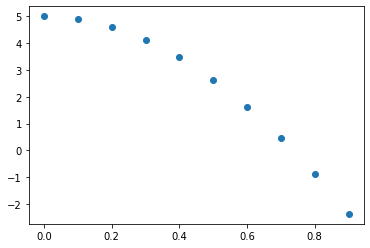

In [60]:
plt.plot(x,f(x),'o')

In [66]:
rootsearch(f,0,1,1e-4)

(0.7345999999999354, 0.7346999999999354)

In [65]:
root_scalar(f,bracket=[0,1])

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 0.7346035077893034

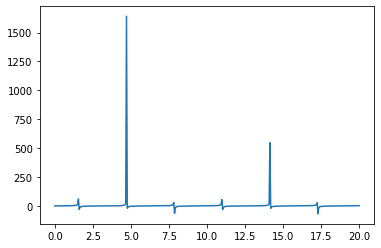

In [68]:

def f(x):
  return x-np.tan(x)

xx=np.linspace(0,20,400)
plt.plot(xx,np.tan(xx))

In [69]:
rootsearch(np.tan,1,2,0.1) #tan부호가 바뀌는 지점을 정답이라 생각한다 (rootsearch 방법 문제)

(1.5000000000000004, 1.6000000000000005)

In [76]:
bisection(np.tan,-1,1,switch=1,tol=1e-8)

0.0

In [78]:
def f(x):
  return np.tan(x)

a,b,dx=(0,30,0.001)

while True:
  x1,x2=rootsearch(f,a,b,dx)
  if x1 !=None:
    a = x2
    rootval = bisection(f,x1,x2,1)
    if rootval != None:
      print('root',rootval)
  else:
    break

root 0
root 3.141592653751138
root 6.283185307026343
root 9.424777960300661
root 12.566370614527127
root 15.707963267799922
root 18.84955592107778
root 21.991148575309836
root 25.132741228588202
root 28.274333881866575


In [89]:
bisection(f,-7.8,-7.7,1)

-7.725251836702228

In [82]:
def f(x):
  return x-np.tan(x)

a,b,dx=(-20,0,0.001)

while True:
  x1,x2=rootsearch(f,a,b,dx)
  if x1 !=None:
    a = x2
    rootval = bisection(f,x1,x2,1)
    if rootval != None:
      print('root',rootval)
  else:
    break

root -17.220755272385063
root -14.066193912979127
root -10.904121659753642
root -7.7252518372530234
root -4.493409457681938
root 1.4598253161857144e-12
root 1.4598253161857144e-12
